## Task 1 & 2: Load CSV File and Inspect Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the CSV file
csv_paths = ['4Stu_2022_1117_1219 DataWithToolInfo.csv',
             '4Stu_2023_0118_0127  DataWithToolInfo.csv']

df_list = []
for path in csv_paths:
    df_part = pd.read_csv(path,
                          sep=';',
                          parse_dates=['timestamp_skv', 'timestamp_sensor', 'timestamp', 'timestamp.1', 'timestamp.2'],
                          dayfirst=True)
    df_list.append(df_part)

df = pd.concat(df_list, ignore_index=True)

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")

df.head()


✓ Dataset loaded successfully!
Shape: 173,863 rows × 165 columns

First few rows:


,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.0,0.106,0.001282,0.000000e+00,9.528109e-08,0.057929,0.020091,1.327992e-04,0.000017,0.000033,0.001752,0.000030,0.077239,2.465726e-13,-37.505,0.003124,0.003845,0.000010,1.0,0.020091,0.432020,2.937199e-07,0.001948,0.007690,0.001772,0.063266,1.485655e-11,-62.883,0.001530,0.005249,8.525751e-07,0.364422,0.009451,0.125858,7.585417e-08,0.000394,0.006774,0.000576,0.082633,2.584330e-12,-69.437,0.000977,0.024658,9.546103e-07,1.0,0.005274,0.773180,3.462037e-08,0.000711,0.001709,0.001381,0.111406,6.270418e-13,-72.428,0.001174,0.000007,1.413827e-07,0.102639,0.023598,0.005733,0.000015,0.000047,0.001938,0.000032,0.116880,4.413320e-14,0.0,0.003414,0.001343,0.000012,1.0,0.023598,0.734092,6.929884e-07,0.001979,0.008850,0.001728,0.075898,1.682045e-12,-59.874,0.002292,0.005920,0.000002,0.455611,0.011768,0.217750,7.585417e-08,0.000776,0.002075,0.002438,0.065509,1.843108e-12,-66.428,0.001683,0.021973,0.000003,1.000000,0.009421,0.754380,6.943981e-08,0.001233,0.001953,0.001244,0.101501,6.064764e-13,-72.428,4.707,0.614,0.590,0.756,0.747,4.949,4.392,5.349,5.926,-0.036,0.010,255.0,4.707,0.628,0.598,0.764,0.740,4.945,4.380,5.329,5.918,0.014,-0.001,255.0,4.706,0.618,0.584,0.753,0.744,4.951,4.388,5.345,5.916,0.020,-0.019,255.0,4.717,0.629,0.593,0.763,0.741,4.955,4.390,5.345,5.899,0.034,-0.009,255.0,2022-11-17 04:31:39,28.905273,2022-11-17 04:31:39,936.01,2022-11-17 04:31:39,24.12,104563,0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.5,0.606,0.001656,4.291534e-06,1.413794e-07,0.051529,0.036128,1.924038e-04,0.000017,0.000035,0.047299,0.000022,0.084805,2.772125e-13,-37.150,0.003855,0.005737,0.000015,1.0,0.036128,0.384472,

In [4]:
# Examine column names
print("Column Names:")
print("="*80)
print(f"\nTotal columns: {len(df.columns)}\n")

# Group columns by type
timestamp_cols = [col for col in df.columns if 'timestamp' in col.lower()]
sound_ch1_cols = [col for col in df.columns if col.startswith('ST_CH1')]
sound_ch2_cols = [col for col in df.columns if col.startswith('ST_CH2')]
camera_cols = [col for col in df.columns if 'SKV' in col]
sensor_cols = [col for col in df.columns if any(x in col for x in ['_RH', '_PRESS', '_TEMP'])]
tool_cols = [col for col in df.columns if col in ['pieces', 'tool_io']]

print(f"Timestamp columns: {len(timestamp_cols)}")
print(f"Sound features CH1: {len(sound_ch1_cols)}")
print(f"Sound features CH2: {len(sound_ch2_cols)}")
print(f"Camera features: {len(camera_cols)}")
print(f"Environmental sensor features: {len(sensor_cols)}")
print(f"Tool data columns: {len(tool_cols)}")

print("\n" + "="*80)
print("\nSample column names by category:")
print(f"\nTimestamps (first 5): {timestamp_cols[:5]}")
print(f"\nSound CH1 (first 10): {sound_ch1_cols[:10]}")
print(f"\nSound CH2 (first 10): {sound_ch2_cols[:10]}")
print(f"\nCamera (first 10): {camera_cols[:10]}")
print(f"\nSensors: {sensor_cols}")
print(f"\nTool data: {tool_cols}")

Column Names:

Total columns: 165

Timestamp columns: 5
Sound features CH1: 52
Sound features CH2: 52
Camera features: 48
Environmental sensor features: 3
Tool data columns: 1


Sample column names by category:

Timestamps (first 5): ['timestamp_skv', 'timestamp_sensor', 'timestamp', 'timestamp.1', 'timestamp.2']

Sound CH1 (first 10): ['ST_CH1_P_F0', 'ST_CH1_P_F1', 'ST_CH1_P_F2', 'ST_CH1_P_F3', 'ST_CH1_P_F4', 'ST_CH1_P_F5', 'ST_CH1_P_F6', 'ST_CH1_P_F7', 'ST_CH1_P_F8', 'ST_CH1_P_F9']

Sound CH2 (first 10): ['ST_CH2_P_F0', 'ST_CH2_P_F1', 'ST_CH2_P_F2', 'ST_CH2_P_F3', 'ST_CH2_P_F4', 'ST_CH2_P_F5', 'ST_CH2_P_F6', 'ST_CH2_P_F7', 'ST_CH2_P_F8', 'ST_CH2_P_F9']

Camera (first 10): ['4.713 SKV#1', '0.604 min SKV#1', '0.604 max SKV#1', '0.74 min SKV#1', '0.74 max SKV#1', '4,96 SKV#1', '4,40 SKV#1', '5,36 SKV#1', '5,92 SKV#1', 'Sym aussen SKV#1']

Sensors: ['Beacon INT0028 - BME280_RH', 'Beacon INT0028 - BMP280_PRESS', 'Beacon INT0028 - BMP280_TEMP']

Tool data: ['pieces']


In [5]:
df[timestamp_cols]

,timestamp_skv,timestamp_sensor,timestamp,timestamp.1,timestamp.2
0,2022-11-17 16:33:49.400,2022-11-17 16:33:49.506,2022-11-17 04:31:39,2022-11-17 04:31:39,2022-11-17 04:31:39
1,2022-11-17 16:33:50.400,2022-11-17 16:33:51.006,2022-11-17 04:31:39,2022-11-17 04:31:39,2022-11-17 04:31:39
2,2022-11-17 16:33:52.400,2022-11-17 16:33:52.506,2022-11-17 04:31:39,2022-11-17 04:31:39,2022-11-17 04:31:39
3,2022-11-17 16:33:53.400,2022-11-17 16:33:54.006,2022-11-17 04:31:39,2022-11-17 04:31:39,2022-11-17 04:31:39
4,2022-11-17 16:33:55.400,2022-11-17 16:33:55.506,2022-11-17 04:31:39,2022-11-17 04:31:39,2022-11-17 04:31:39
...,...,...,...,...,...
173858,2023-01-27 17:09:24.400,2023-01-27 17:09:25.261,2023-01-27 05:08:27,2023-01-27 05:08:27,2023-01-27 05:08:27
173859,2023-01-27 17:09:26.400,2023-01-27 17:09:26.625,2023-01-27 05:08:27,2023-01-27 05:08:27,2023-01-27 05:08:27
173860,2023-01-27 17:09:27.400,2023-01-27 17:09:27.988,2023-01-27 05:08:27,2023-01-27 05:08:27,2023-01-27 05:08:27
173861,2023-01-27 17:09:28.400,2023-01-27 17:09:29.352,2023-01-27 05:09:28,2023-01-27 05:09:28,2023-01-27 05:09:28


In [6]:
# Check data types and missing values
print("Data Info:")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("\nMissing Values Summary:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
}).sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"\nColumns with missing values: {len(missing_df)}")
    print(missing_df.head(20))
else:
    print("\n✓ No missing values found!")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173863 entries, 0 to 173862
Columns: 165 entries, timestamp_skv to tool io
dtypes: datetime64[ns](5), float64(158), int64(2)
memory usage: 218.9 MB
None


Missing Values Summary:

Columns with missing values: 35
                    Missing Count  Percentage
4,96 SKV#2                     16    0.009203
4,40 SKV#2                     16    0.009203
5,36 SKV#2                     16    0.009203
Sym Einstich SKV#2             16    0.009203
Sym aussen SKV#2               16    0.009203
5,92 SKV#2                     16    0.009203
0.74 max SKV#2                 16    0.009203
0.74 min SKV#2                 16    0.009203
0.604 max SKV#2                16    0.009203
0.604 min SKV#2                16    0.009203
4.713 SKV#2                    16    0.009203
4,96 SKV#3                     13    0.007477
4,40 SKV#3                     13    0.007477
5,36 SKV#3                     13    0.007477
0.74 max SKV#3                 13    

### Task 3: Check Timestamps
Firstly check whether the timestamps are equidistant – reflecting a constant rate of
production – or whether there are "pause"-intervals!
If you find such intervals try to formulate hypotheses to explain these "pauses"!

In [7]:
timestamp_cols

['timestamp_skv',
 'timestamp_sensor',
 'timestamp',
 'timestamp.1',
 'timestamp.2']

In [8]:
df['timestamp_skv']

0        2022-11-17 16:33:49.400
1        2022-11-17 16:33:50.400
2        2022-11-17 16:33:52.400
3        2022-11-17 16:33:53.400
4        2022-11-17 16:33:55.400
                   ...          
173858   2023-01-27 17:09:24.400
173859   2023-01-27 17:09:26.400
173860   2023-01-27 17:09:27.400
173861   2023-01-27 17:09:28.400
173862   2023-01-27 17:09:30.400
Name: timestamp_skv, Length: 173863, dtype: datetime64[ns]

<Axes: >

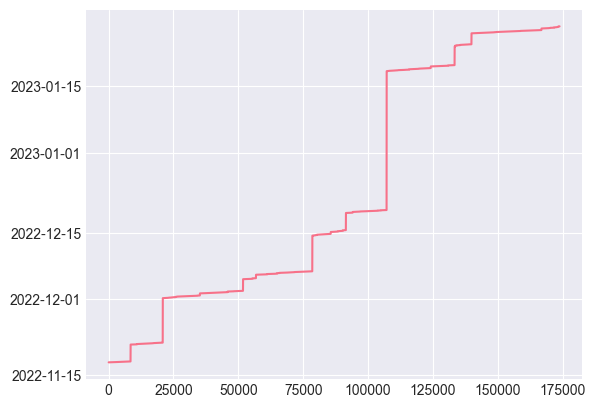

In [10]:
df['timestamp_skv'].plot()

In [17]:
df['timestamp_skv'].diff()[df['timestamp_skv'].diff() > pd.Timedelta('1 hour')]

8432      3 days 13:32:39
10884     0 days 01:18:42
20841     9 days 09:24:34
25833     0 days 01:04:44
35156     0 days 10:23:52
45858     0 days 03:07:08
51793     2 days 10:44:26
56784     0 days 17:26:58
61110     0 days 01:20:56
64923     0 days 02:24:01
65802     0 days 01:02:25
78508     7 days 12:21:50
80289     0 days 01:19:13
85604     0 days 09:25:49
90244     0 days 02:25:07
91457     3 days 14:29:29
94118     0 days 02:46:38
107160   29 days 08:30:23
115858    0 days 01:45:52
124167    0 days 08:15:40
130933    0 days 01:36:21
133375    3 days 22:11:21
133502    0 days 01:56:37
133641    0 days 02:28:44
134274    0 days 01:04:41
135543    0 days 01:09:40
139878    2 days 07:32:07
166852    0 days 07:48:17
171750    0 days 01:21:21
173395    0 days 01:14:01
Name: timestamp_skv, dtype: timedelta64[ns]

In [12]:
df[df['timestamp_skv'].diff() > pd.Timedelta('1 hour')].index

Index([  8432,  10884,  20841,  25833,  35156,  45858,  51793,  56784,  61110,
        64923,  65802,  78508,  80289,  85604,  90244,  91457,  94118, 107160,
       115858, 124167, 130933, 133375, 133502, 133641, 134274, 135543, 139878,
       166852, 171750, 173395],
      dtype='int64')

In [13]:
df.iloc[[8432,  10884,  20841,  25833,  35156,  45858,  51793,  56784,  61110,
        64923,  65802,  78508,  80289,  85604,  90244,  91457,  94118, 107160,
       115858, 124167, 130933, 133375, 133502, 133641, 134274, 135543, 139878,
       166852, 171750, 173395]]['timestamp_skv']

8432     2022-11-21 10:43:05.400
10884    2022-11-21 13:13:01.400
20841    2022-12-01 06:08:51.400
25833    2022-12-01 12:43:20.400
35156    2022-12-02 06:11:59.400
45858    2022-12-02 15:49:11.400
51793    2022-12-05 06:03:16.400
56784    2022-12-06 04:57:06.400
61110    2022-12-06 08:26:44.400
64923    2022-12-06 12:56:35.400
65802    2022-12-06 14:29:03.400
78508    2022-12-14 10:47:50.400
80289    2022-12-14 15:54:04.400
85604    2022-12-15 05:46:17.400
90244    2022-12-15 14:14:17.400
91457    2022-12-19 05:56:01.400
94118    2022-12-19 11:31:08.400
107160   2023-01-18 05:42:43.400
115858   2023-01-18 15:15:48.400
124167   2023-01-19 05:41:36.400
130933   2023-01-19 11:00:22.400
133375   2023-01-23 10:35:59.400
133502   2023-01-23 12:44:11.400
133641   2023-01-23 15:20:45.400
134274   2023-01-23 17:00:07.400
135543   2023-01-23 19:03:46.400
139878   2023-01-26 05:41:42.400
166852   2023-01-27 06:01:33.400
171750   2023-01-27 11:42:12.400
173395   2023-01-27 16:49:45.400
Name: time

In [21]:
df.iloc[133374][['timestamp_skv','pieces']]

timestamp_skv    2023-01-19 12:24:38.400000
pieces                                23141
Name: 133374, dtype: object

In [20]:
df.iloc[133375][['timestamp_skv','pieces']]

timestamp_skv    2023-01-23 10:35:59.400000
pieces                                68164
Name: 133375, dtype: object

<Axes: >

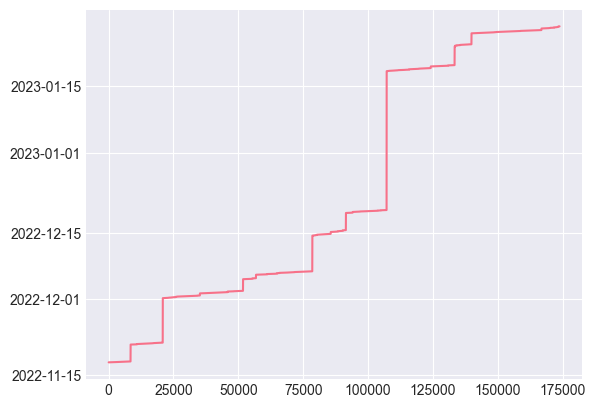

In [14]:
df['timestamp_skv'].plot()

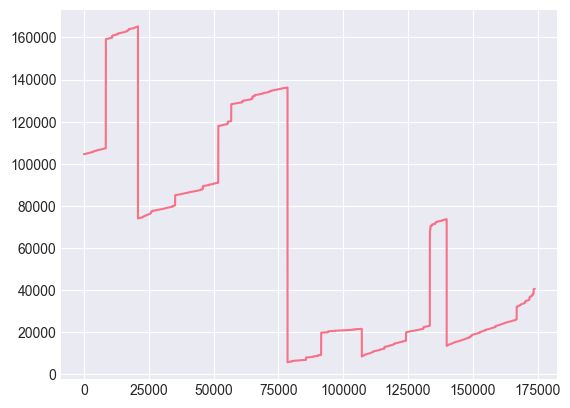

In [15]:
plt.plot(df['pieces'])

* 17 nov  -  21 nov (~3 days)  ->  pieces count increases
* 21 nov  -  01 dec (~9 days)  ->  pieces drastically decreased
* 02 dec  -  05 dec (~2 days)  ->  pieces count were increased
* 06 dec  -  14 dec (~7 days)  ->  pieces count setted (nearly 0) -> Maintanance 
* ~3 days  - 
* ~29 days - a month data not available 20/12 - 17/01
* ~3 days
* ~9 days
There are pauses many times but these were the longest, Other which are hourly can be consider as small pause, shift changes,

In [16]:
# Calculate time differences
time_diffs = df['timestamp_skv'].diff()

# Check if equidistant
print(time_diffs.describe())
print(f"Most common time gap: {time_diffs.mode()[0]}")

count                       173862
mean     0 days 00:00:35.295469970
std      0 days 01:52:26.294347521
min                0 days 00:00:00
25%                0 days 00:00:01
50%                0 days 00:00:02
75%                0 days 00:00:02
max               29 days 08:30:23
Name: timestamp_skv, dtype: object
Most common time gap: 0 days 00:00:02
